<a href="https://colab.research.google.com/github/rumorale/Capstone/blob/master/Ayudant%C3%ADas/A3/Desarrollo/A3_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 2.1: Conexión APIs y   Web Scraping con R**

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

## **Preliminares**

Para el desarrollo de este taller, se propondrá el uso de un ciclo `for` para iterar y generar varias consultas a una API en particular. Si bien el problema puede abordarse mediante otros métodos, el objetivo es introducir uno de los ciclos más comunes en un lenguaje de programación.

## Ciclo `for` en R

En R, así como en varios lenguajes de programación es posible desarrollar ciclos (loops) que iteren sobre un determinado arreglo o conjunto de opciones. Particularmente, un ciclo for, permite ejecutar un código dentro de un loop, el cual va recorriendo una variable de interés dentro de un arreglo de opciones. Este arreglo puede ser una secuencia (vector) de números, letras, palabras, valores lógicos, filas/columnas de un data.frame, elementos de una lista, o cualquier objeto que se pueda *indexar sobre alguna variable numerable*.

La sintáxis básica de un ciclo for en R es la siguiente, donde `variable` es un objeto local creado en memoria con el valor de cada elemento de `valores`:



```
for(variable in valores){
    # código a iterar, puede depender de `variable`
}
```


Por ejemplo, si quisiérmos imprimir cada elemento de un vector, junto con un mensaje, lo podemos realizar de la siguiente manera:



In [ ]:
# definimos un vector de elementos sobre los que iterar
palabras <- c("banana", "mundo", "carrera", "virus")

In [ ]:
palabras

In [ ]:
# También podemos recorrer el vector de palabras mediante la posición
# La función seq_along genera un vector índices del mismo largo que su argumento (1:4 en este caso)
for(pos in 1:6){
  print(paste("Palabra",pos,":", palabras[pos])) # subsetting
}

Claro está que la lógica del código a implementar será tan compleja como el problema a abordar. Así, el valor de la variable que recorre el ciclo for, la podemos utilzar (como se nos dé la gana), en particular como parámetro(s) de otras funciones.

Por ejemplo, podemos generar 100 muestras aleatorias de tamaño 200 de una distribución normal con media 1,2,3,...,100, calcular sus promedios, y guardar estos valores en una tabla.



In [ ]:
medias <- 1:100
resultado <- data.frame()

for(mu in medias){
  # Generamos una muestra de 200 elementos
  muestra <- rnorm(200, mean = mu, sd = 1)
  # Almacenamos la media muestral y la real
  aux <- data.frame(media_muestral = mean(muestra), media_real = mu)
  # Acumulamos el resultado en un data.frame
  resultado <- dplyr::bind_rows(resultado,aux)
}

resultado


## **Seccion 1: Mi indicador**
**NOTA:** la siguietne información y detalles adicionales los pueden encontrar en el link [https://mindicador.cl/](https://mindicador.cl/). <br>

Este es un servicio open source (web service) que entrega los principales indicadores económicos para Chile en formato JSON. Tanto los indicadores diarios como históricos para que desarrolladores puedan utilizarlos en sus aplicaciones o sitios web.

La aplicación mapea constantemente el sitio del Banco Central de Chile manteniendo así nuestra base de datos actualizada con los últimos valores del día.

### **¿Cómo utilizar la API en tu proyecto?**

La API proporciona los datos de los siguientes indicadores económicos `[uf, ivp, dolar, dolar_intercambio, euro, ipc, utm, imacec, tpm, libra_cobre, tasa_desempleo, bitcoin]`, y los puedes consultar de 4 formas distintas.

### 1. Consultar todos los indicadores económicos 
Entrega los últimos valores registrados de los principales indicadores `https://mindicador.cl/api`



```
{
  "version": "1.6.0",
  "autor": "mindicador.cl",
  "fecha": "2020-10-13T21:00:00.000Z",
  "uf": {
    "codigo": "uf",
    "nombre": "Unidad de fomento (UF)",
    "unidad_medida": "Pesos",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 28738.63
  },
  "ivp": {
    "codigo": "ivp",
    "nombre": "Indice de valor promedio (IVP)",
    "unidad_medida": "Pesos",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 30079.15
  },
  "dolar": {
    "codigo": "dolar",
    "nombre": "Dólar observado",
    "unidad_medida": "Pesos",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 796.05
  },
  "dolar_intercambio": {
    "codigo": "dolar_intercambio",
    "nombre": "Dólar acuerdo",
    "unidad_medida": "Pesos",
    "fecha": "2014-11-13T03:00:00.000Z",
    "valor": 758.87
  },
  "euro": {
    "codigo": "euro",
    "nombre": "Euro",
    "unidad_medida": "Pesos",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 940.85
  },
  "ipc": {
    "codigo": "ipc",
    "nombre": "Indice de Precios al Consumidor (IPC)",
    "unidad_medida": "Porcentaje",
    "fecha": "2020-09-01T04:00:00.000Z",
    "valor": 0.6
  },
  "utm": {
    "codigo": "utm",
    "nombre": "Unidad Tributaria Mensual (UTM)",
    "unidad_medida": "Pesos",
    "fecha": "2020-10-01T03:00:00.000Z",
    "valor": 50372
  },
  "imacec": {
    "codigo": "imacec",
    "nombre": "Imacec",
    "unidad_medida": "Porcentaje",
    "fecha": "2020-08-01T04:00:00.000Z",
    "valor": -11.3
  },
  "tpm": {
    "codigo": "tpm",
    "nombre": "Tasa Política Monetaria (TPM)",
    "unidad_medida": "Porcentaje",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 0.5
  },
  "libra_cobre": {
    "codigo": "libra_cobre",
    "nombre": "Libra de Cobre",
    "unidad_medida": "Dólar",
    "fecha": "2020-10-13T03:00:00.000Z",
    "valor": 3.03
  },
  "tasa_desempleo": {
    "codigo": "tasa_desempleo",
    "nombre": "Tasa de desempleo",
    "unidad_medida": "Porcentaje",
    "fecha": "2020-08-01T04:00:00.000Z",
    "valor": 12.93
  },
  "bitcoin": {
    "codigo": "bitcoin",
    "nombre": "Bitcoin",
    "unidad_medida": "Dólar",
    "fecha": "2020-10-10T03:00:00.000Z",
    "valor": 11302.67
  }
}
```








### 2. Consultar por tipo de indicador económico
Entrega los valores del último mes del indicador consultado `https://mindicador.cl/api/{tipo_indicador}`



```
{
  "version": "1.6.0",
  "autor": "mindicador.cl",
  "codigo": "uf",
  "nombre": "Unidad de fomento (UF)",
  "unidad_medida": "Pesos",
  "serie": [
    {
      "fecha": "2020-10-13T03:00:00.000Z",
      "valor": 28738.63
    },
    {
      "fecha": "2020-10-12T03:00:00.000Z",
      "valor": 28733.09
    },
    "..."
  ]
}
```
### 3. Consultar por tipo de indicador económico dada una fecha determinada
Entrega el valor del indicador consultado según la fecha especificada https://mindicador.cl/api/{tipo_indicador}/{dd-mm-yyyy}
```
{
  "version": "1.6.0",
  "autor": "mindicador.cl",
  "codigo": "uf",
  "nombre": "Unidad de fomento (UF)",
  "unidad_medida": "Pesos",
  "serie": [
    {
      "fecha": "2020-10-13T03:00:00.000Z",
      "valor": 28738.63
    }
  ]
}


```

### 4. Consultar por tipo de indicador económico dado un año determinado
Entrega los valores del indicador consultado según el año especificado https://mindicador.cl/api/{tipo_indicador}/{yyyy}
```
{
  "version": "1.6.0",
  "autor": "mindicador.cl",
  "codigo": "uf",
  "nombre": "Unidad de fomento (UF)",
  "unidad_medida": "Pesos",
  "serie": [
    {
      "fecha": "2020-11-09T03:00:00.000Z",
      "valor": 28888.76
    },
    {
      "fecha": "2020-11-08T03:00:00.000Z",
      "valor": 28883.18
    },
    "..."
  ]
}
```
## Preguntas sección 1

**P1** Obtenga los valores del _ipc_ para el año 2021. Para ello considere la url base como `https://mindicador.cl`, y en el argumento path, indique la ruta con lo parámetros de la consulta. 

Ejemplo: la consulta `https://mindicador.cl/api/ipc/2021` se puede generar con la url base indicada previamente, con argumento `path = "/api/ipc/2021"`



**P2** Mediante un ciclo for, obtenga los valores de la serie del ipc para los años comprendidos entre el 1980 y el 2020 inclusive. Guarde el contenido del campo llamado `serie` de cada iteración,  en una lista llamada `lista_ipc`.



**P3** Con ayuda de la función `bind_rows` del packae `dplyr`, consolide la lista `lista_ipc` en un dataframe llamado `df_ipc` con la siguiente estructura:


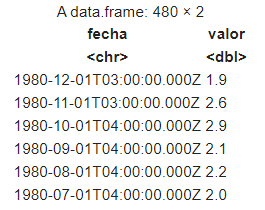



**P4** A partir del campo fecha del data.frame `lista_ipc`, cree una columna que contenga el año del registro. Puede considerar convertir el campo fecha a clase Date o bien extraer el susbtring de los 4 primeros caracteres del campo fecha.

**P5** Genere una tabla resumen que contenga el promedio del valor del ipc por cada año. Esta tabla debe contener tantos registro como años distintos hay comprendidos entre el 1980 y 2019.



## **Seccion 2: PIB Chile, Wikipedia**

En esta segunda sección, utilizaremos las nociones básicas de web scraping para extraer información de la web cuando no contamos con alguna API a la mano.

Para ello, usted tendrá que extraer la información del PIB anual de Chile, para los años comprendidos entre el 1980 y 2019 inclusive. Esta información usted la deberá extraer con las funcionalidades provistas por el package `rvest`. 

La información está disponible en el link https://es.wikipedia.org/wiki/Econom%C3%ADa_de_Chile. Las tablas con las que deberá generar el scraping son las que se muestran en la imagen a continuación

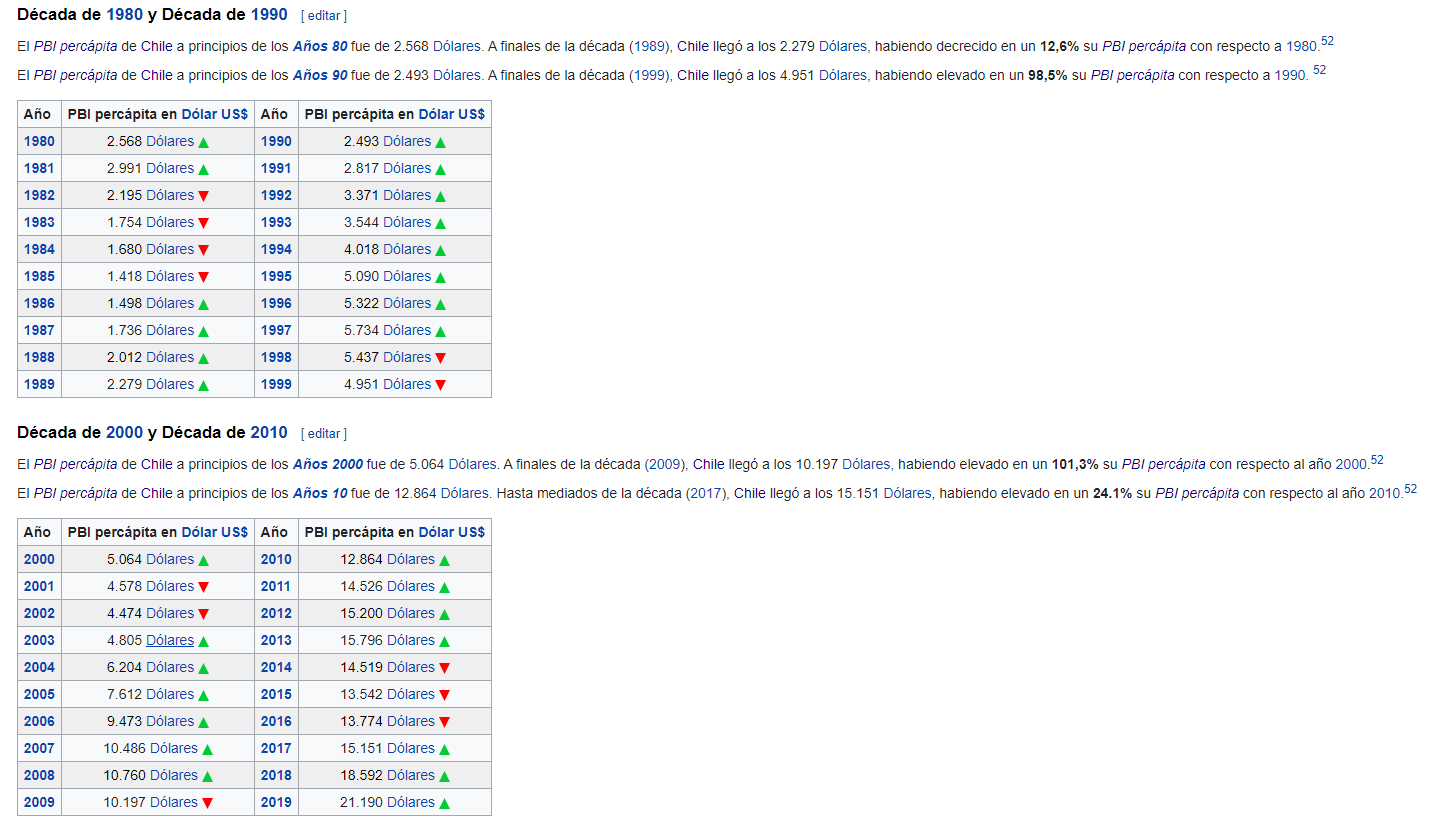



Para lograr descargar la información, tenga en cuenta los siguientes aspectos:


*   En google chrome (y en la mayoría de los exploradores), es posible inspeccionar los elementos de la página web presionando el botón F12. Recuerde que para acceder a un nodo o tag en particular, es necesario rescatar la ruta del objeto, la cual puede ser indicada mediante el puntero css o bien mediante su xpath. Estas rutas se pueden obtener haciendo click derecho en el elemento de interés.

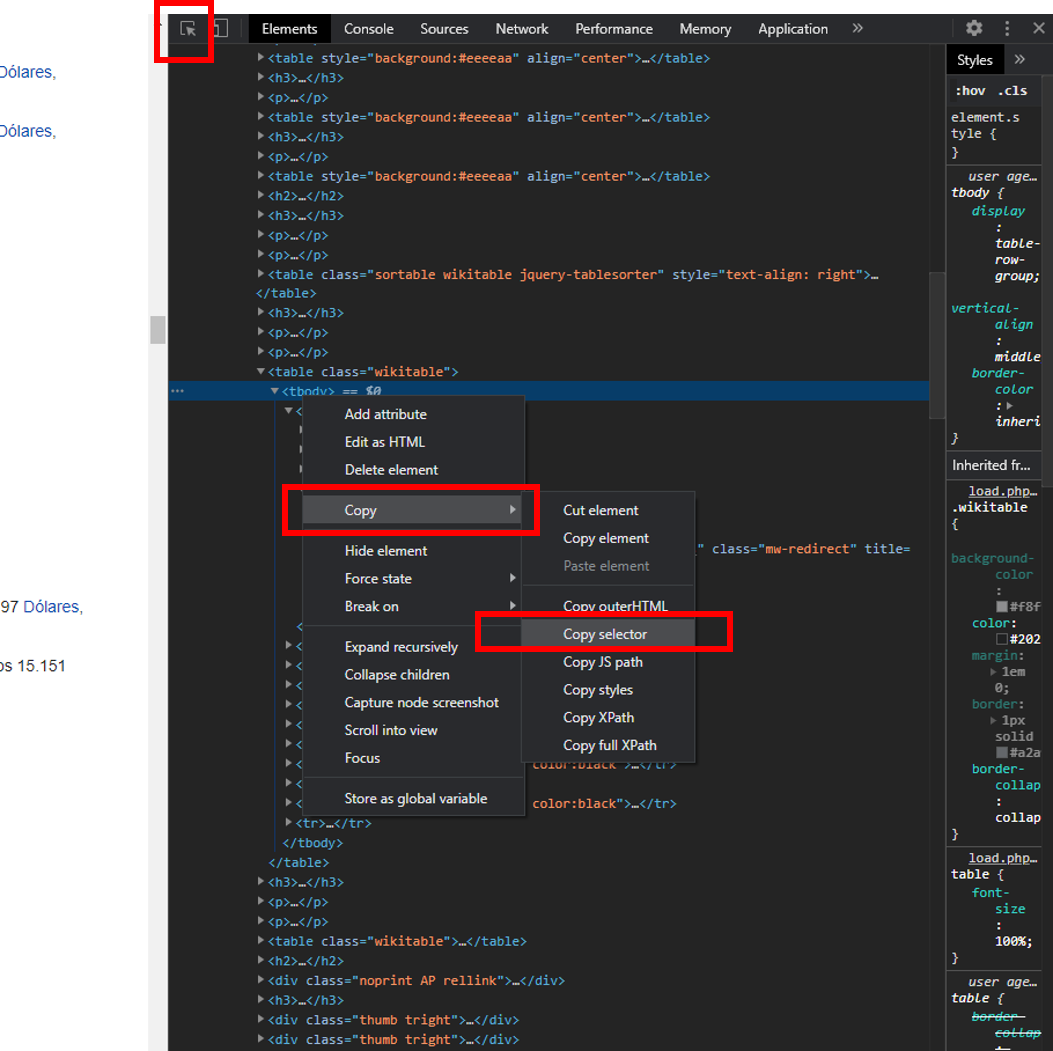


*   Una vez rescatada las tablas de interés y almacenadas como objetos de R (data.frames en este caso),   usted deberá procurar realizar una pequeña limpieza de su tabla, a nodo de generar las dos  columnas de interés (año y valor del PIB) 



## Preguntas sección 2

**P1** Obtenga las dos tablas mencionadas en la introducción y guárdelas en dos objetos. ¿A qué clase de objetos corresponden?


**P2** Consolide  la información en un tabla que contenga dos columnas, una con los años y otra con el valor del PIB de Chile. Para ello tenga en consideración los siguiente:

  * Evite la utilización de "ñ" y espacios en blanco en los nombres de las columnas. Así por ejemplo, la información del año la puede guardar en una columna llamada `anio` y elvalor del pib otra llamada `pib_percap_usd`.
  * Tenga en cuenta que ambas columnas deben ser de tipo de dato numérico. De ser de utilidad puede utilizar la función `gsub` para reeplazar una palabra por por un espacio en blanco, o bien la función `substring` para extraer parte de un texto.
  

## **Seccion 3: Cruce de info y visualizaciones con base** 
Finalmente, se busca consolidar la información obtenida desde la API miindicador, y la información de wikipedia del PIB histórico de Chile. 

## Preguntas sección 2

**P1** Consolide ambas tablas en una sola, que contenga 3 columnas: Año, valor del PIB y valor promedio del IPC.
 


**P2** Con la ayuda de los comandos `plot` y  `lines`, genere un gráfico de líneas sencillo donde se muestre la evolución del PIB y la evolución del IPC pomedio.

**NOTA:** 
* El agumento _type_ de `plot` indica el tipo de  trazado.`"l"` es para líneas.
* El argumento _ylim_ de `plot` permite controlar el alto de la ventana de visualizaciñon. Recibe in vector con el inicio y fin del eje. Por ejemlo `ylim = c(0,22)` muestra el gráfico solicitado pero con la ventana restringida a los valores de Y comprendidos entre 0 y 22.


**P3** En ocasiones es de interés analizar las variaciones de una serie en vez de sus valores observados, por ejemplo, si en un año el pib fue de 10 y al año siguiente fue de 15, se tiene entonces una variación del 50%. Genere una nueva columna en el dataset ya consolidadao, que contenga dicha variación para la evolución del PIB.

**NOTA:** Puede ser de utilidad la función `lag` del package dplyr.


**P4** replique el gráfico de la pregunta 2, pero esta vez considerando las variaciones anuales del PIB.



**P4** Considere ahora de las variaciones anuales promedio del PIB por cada **década**. ¿Cuál es la década que presentó la mayor variación promedio? ¿Y la menor variación?


**P5** Finalmente, exporte su tabla consolidada a una rchivo *.csv para la posterioridad.